In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 31
dx = 1.0
d = 4.0
x0 = 4.0
max_iter = 500
w = 1.9
delta_vals = [0.0, 0.5, 1.0]

In [3]:
x = np.arange(-N, N+1, dx)
y = np.arange(-N, N+1, dx)
X, Y = np.meshgrid(x, y, indexing='ij')
rho = np.exp(-((X - x0)**2 + Y**2) / d**2) - np.exp(-((X + x0)**2 + Y**2) / d**2)

In [4]:
def compute_S(u, rho):
    lapx = (u[2:,1:-1] + u[:-2,1:-1] - 2*u[1:-1,1:-1]) / dx**2
    lapy = (u[1:-1,2:] + u[1:-1,:-2] - 2*u[1:-1,1:-1]) / dx**2
    u_c = u[1:-1,1:-1]
    rho_c = rho[1:-1,1:-1]
    S_local = -0.5 * u_c * (lapx + lapy) - rho_c * u_c
    return np.sum(S_local) * dx**2

In [5]:
def compute_Sloc(u, rho, i, j):
    Sloc = 0.0
    for ii in (i-1, i, i+1):
        for jj in (j-1, j, j+1):
            lapx = (u[ii+1,jj] + u[ii-1,jj] - 2*u[ii,jj]) / dx**2
            lapy = (u[ii,jj+1] + u[ii,jj-1] - 2*u[ii,jj]) / dx**2
            Sloc -= (0.5*u[ii,jj]*(lapx + lapy) + rho[ii,jj]*u[ii,jj]) * dx**2
    return Sloc

In [6]:
# zad1
u1 = np.zeros_like(X)
S1_vals = []
for it in range(1, max_iter+1):
    u_old = u1.copy()
    u1[1:-1, 1:-1] = (u_old[2:, 1:-1] + u_old[:-2, 1:-1] + u_old[1:-1, 2:] + u_old[1:-1, :-2] + rho[1:-1, 1:-1] * dx**2) / 4.0
    S1_vals.append(compute_S(u1, rho))

In [7]:
# zad2
u2 = np.zeros_like(X)
S2_vals = []
for it in range(1, max_iter+1):
    for i in range(1, 2*N):
        for j in range(1, 2*N):
            u_new = (u2[i+1,j] + u2[i-1,j] + u2[i,j+1] + u2[i,j-1] + rho[i,j]*dx**2) / 4.0
            u2[i,j] = (1 - w)*u2[i,j] + w*u_new
    S2_vals.append(compute_S(u2, rho))

In [8]:
# zad3(1)
u3 = np.zeros_like(X)
S3_vals = []
for it in range(1, max_iter+1):
    for i in range(2, 2*N-1):       
        for j in range(2, 2*N-1):
            u0 = u3[i,j]
            Sloc0 = compute_Sloc(u3, rho, i, j)

            # oblicz Sloc przy δ = 0, 0.5, 1.0
            S_pts = []
            for delta in delta_vals:
                u3[i,j] = u0 + delta
                S_pts.append(compute_Sloc(u3, rho, i, j))
            u3[i,j] = u0 

            S1, S2, S3 = S_pts
            num = 3*S1 - 4*S2 + S3
            den =   S1 - 2*S2 + S3
            delta4 = 0.25 * num/den if abs(den)>1e-12 else 0.0

            u3[i,j] = u0 + delta4
            S4 = compute_Sloc(u3, rho, i, j)
            cands = [ (delta_vals[k], S_pts[k]) for k in range(3) ] + [(delta4, S4)]
            delta_best, _ = min(cands, key=lambda x: x[1])

            u3[i,j] = u0 + delta_best

    S3_vals.append(compute_S(u3, rho))

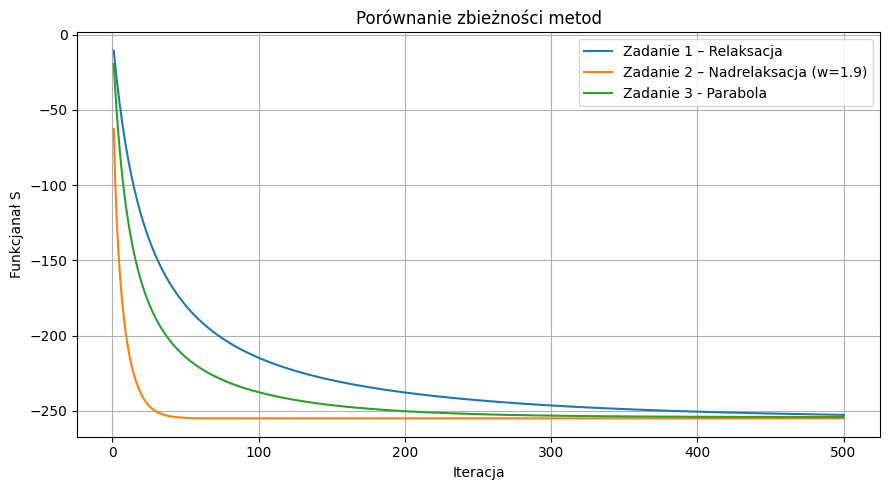

In [9]:
plt.figure(figsize=(9,5))
plt.plot(np.arange(1, max_iter+1), S1_vals, label='Zadanie 1 – Relaksacja')
plt.plot(np.arange(1, max_iter+1), S2_vals, label='Zadanie 2 – Nadrelaksacja (w=1.9)')
plt.plot(np.arange(1, max_iter+1), S3_vals, label='Zadanie 3 - Parabola')
plt.xlabel('Iteracja')
plt.ylabel('Funkcjanał S')
plt.title('Porównanie zbieżności metod')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()